In [10]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D,Flatten

In [11]:
# generators (useful to process large amount of data)

train_ds = keras.utils.image_dataset_from_directory(
    directory = "/kaggle/input/d/salader/dogs-vs-cats/train",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256)
    )

validation_ds = keras.utils.image_dataset_from_directory(
    directory = "/kaggle/input/d/salader/dogs-vs-cats/test",
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256)
    )

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [12]:
# Normalize
def process(image, label):
    image = tf.cast(image/255. , tf.float32)
    return image, label

    train_ds = train_ds.map(process)
    validation_ds = validation_ds.map(process)

In [13]:
# Create CNN model

model = Sequential()

model.add(Conv2D(32, kernel_size = (3,3), padding = 'valid', activation = 'relu', input_shape = (256,256,3)))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Conv2D(64, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Conv2D(128, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 128)      

In [15]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [16]:
history = model.fit(train_ds, epochs = 10, validation_data = validation_ds)

Epoch 1/10
625/625 [==============================] - 37s 56ms/step - loss: 65.8768 - accuracy: 0.5220 - val_loss: 1.0493 - val_accuracy: 0.5382
Epoch 2/10
625/625 [==============================] - 29s 46ms/step - loss: 5.8060 - accuracy: 0.5075 - val_loss: 1.1954 - val_accuracy: 0.5000
Epoch 3/10
625/625 [==============================] - 31s 49ms/step - loss: 3.3316 - accuracy: 0.5127 - val_loss: 21.4715 - val_accuracy: 0.5000
Epoch 4/10
625/625 [==============================] - 29s 46ms/step - loss: 6.1928 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/10
625/625 [==============================] - 28s 45ms/step - loss: 0.6932 - accuracy: 0.4984 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/10
625/625 [==============================] - 29s 46ms/step - loss: 0.6932 - accuracy: 0.4935 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/10
625/625 [==============================] - 29s 46ms/step - loss: 0.6932 - accuracy: 0.4964 - val_loss: 0.6931 - val_accurac

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

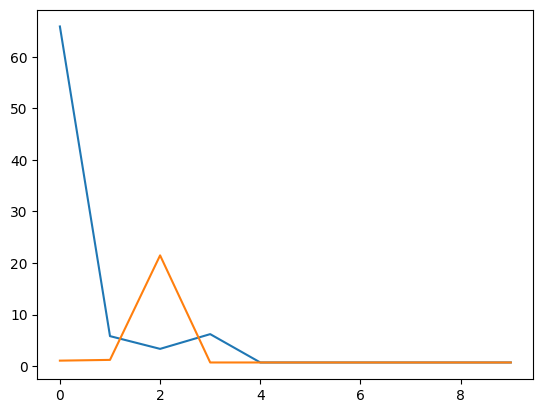

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

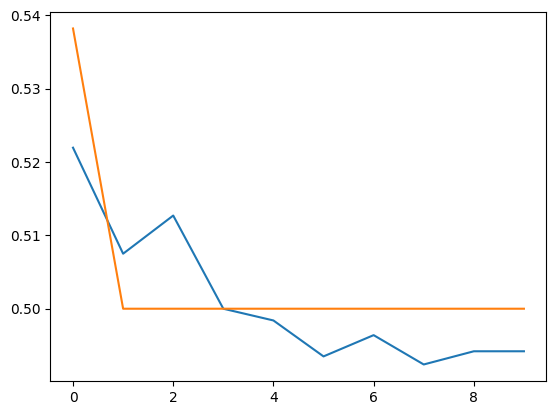

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])